# Supervised Learning

You will now explore data coming from the american Bureau of Transportation Statistics where they recorded (a lot of) data from flights in the US from 1987 to 2008 and analysed the causes of delays. 
We will only look at data from 2008 and a subset of around 100 000 instances. We also removed some of the columns to simplify the analysis

The aim is to build a classifier that can predict whether a flight will arrive with a significant delay given the parameters at takeoff.

### Loading the data

As usual, start by loading `pandas`, `numpy`, `matplotlib` and `seaborn` and load the data corresponding to the file `flights08.csv`.

In [51]:
# code to load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

%matplotlib inline

In [52]:
# add your code to load the data
data = pd.read_csv('data/flights08.csv')


### Getting a first look at the data

Have a look at the data:

* Do the attributes make sense? (see [here](http://stat-computing.org/dataexpo/2009/the-data.html) if needed)
* What's the shape of the dataset?
* How many missing values are present?
* How many unique values are present per attribute? what does that tell you? 

In [38]:
# add your code here to do a first exploration of the data

print(data.head())
print(data.shape)

print('Missing values',pd.isnull(data).apply(np.sum))
print('Uniqueness',data.nunique())

   Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  CRSArrTime  \
0      1           3          4   2003.0        1955        2225   
1      1           3          4    754.0         735        1000   
2      1           3          4    628.0         620         750   
3      1           3          4    926.0         930        1100   
4      1           3          4   1829.0        1755        1925   

   CRSElapsedTime  ArrDelay  DepDelay  Distance  TaxiOut  Cancelled  Diverted  \
0             150     -14.0       8.0       810      8.0          0         0   
1             145       2.0      19.0       810     10.0          0         0   
2              90      14.0       8.0       515     17.0          0         0   
3              90      -6.0      -4.0       515      7.0          0         0   
4              90      34.0      34.0       515     10.0          0         0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           NaN           Na

### Dealing with missing values

The previous step should have shown you two things:

1. some features have a **lot** of missing values (in particular those associated with Delay at departure). In the sequel we will assume that a missing value for a Delay amounts to no Delay. 
2. some feature don't have enough unique values to be interesting (which ones?) and should probably removed. 

Based on this:

* fill the missing values associated with `*Delay` by a 0
* remove the feature(s) that don't have enough variability
* remove all instances that have missing values left

In [53]:
# # add your code here to clean the data
# data.loc[:,[c for c in data.columns if 'Delay' in c]] =data.loc[:,[c for c in data.columns if 'Delay' in c]].fillna(0) 
# pd.isnull(data).sum()

# data = data.drop(['Month','DayOfWeek','Cancelled','Diverted'],axis = 1)


del data['Month']

for col in ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']:
    data[col].fillna(0, inplace=True)

data.dropna(axis=0, inplace=True)


### Extracting the response

Our aim is to predict whether there will be a significative delay. 
The variable that encodes the delay is `ArrDelay`. 

* Start by having a look at it using `distplot` from `seaborn` 
* then compute the delay threshold such that 70% of the positive delays are lower than that threshold (note: if you're struggling to compute this, set the threshold to 26 minutes)
* form a response vector `major_delay` being either 0 or 1 depending on whether the delay is less than or greater or equal to the threshold
* finally remove the `ArrDelay` column from the dataset.

Percentage higher than threshold? 29.381046349328585pct.


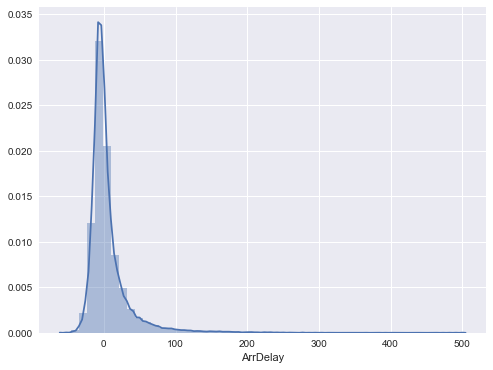

In [54]:
# # add your code here to show the distribution of `ArrDelay`
# plt.figure(figsize=(17,7))
# sbs.distplot(data['ArrDelay'])

# # compute the delay threshold
# threshold=26

# # form the response vector major__delay and remove ArrDelay from the dataset
# major_delay = (data['ArrDelay']>=26).astype(int)

# data = data.drop('ArrDelay',axis=1)


plt.figure(figsize=(8, 6))
sbs.distplot(data['ArrDelay'])

all_delays = data['ArrDelay']
positive_delays = all_delays[all_delays > 0]
delay_threshold = np.percentile(positive_delays, 70)

# Note you can check this worked:
print("Percentage higher than threshold? {}pct.".format(
    100 * sum(positive_delays > delay_threshold) / len(positive_delays)))

major_delay = (all_delays >= delay_threshold).astype(int)

del data['ArrDelay']


### Splitting the data into a training and a testing set

Now that you have reasonably clean data, it's time to split into a training set to train your model(s) and a test set to test those! Sklearn has all that sorted for you, of course. 

Import the function `train_test_split` from `sklearn.model_selection` and check the documentation using the `?` as usual. 

In [56]:
# add your code to load the function and check the doc
from sklearn.model_selection import train_test_split

The key options that you are most likely to use are:

* `test_size` a proportion so a number between 0 and 1, typically `0.2` or `0.3`
* `random_state` an arbitrary integer to seed the train-test split so that your experiments are reproducible
* `stratify` in the case of imbalanced data, you want to make sure your test set and your training set contain similar proportion of the different classes. 

Create `X_train`, `X_test`, `y_train`, `y_test` out of `data` and `major_delay`, use `0.3` as proportion for test and set the random state to `5175`. Specify `major_delay` as the stratifier. 

In [57]:
# add your code here
X_train, X_test, y_train, y_test = train_test_split(data, major_delay, 
                                                    test_size=0.3, random_state=5175,
                                                    stratify=major_delay)


## Decision Tree Classifier (DTC)

We will apply a DTC to the dataset and see how it does.

### Using SkLearn's DTC

The procedure above can be highly optimised making the fitting of a particular DTC very fast. Much like for the kNN, SkLearn offers the `DecisionTreeClassifier` from `sklearn.tree`. Have a look at the documentation then declare a tree with no more than 3 levels. Fit it on the training data. 

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### (Bonus) Visualising the DTC

A nice feature is to export the tree and display it using `graphviz` (http://www.graphviz.org/Download..php) 

* on Mac: install with `Homebrew` using `brew install graphviz`
* on Windows: http://www.graphviz.org/Download_windows.php 
* on Linux: http://www.graphviz.org/Download..php

To do this, 

* import `export_graphviz` from `sklearn.tree`
* use `export_graphviz` on the tree you fitted above specifying a name for the output file like `tree.dot`
* (see also [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html))

To see how it looks, use graphviz: 

```bash
dot -Tpng tree.dot -o tree.png
```

![](tree.png)


In [61]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file='tree.dot')


### Assessing the quality of a DTC

Using

```python
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
```

* recover the confusion matrix on the training or the test set
* recover the classification report on the training or the test set
* adjust the depth of the tree to get optimal results

(**Bonus**) if you have the time: try to explore the parameters of the DTC, what do they mean? do they help? See also [the doc](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). 

In [63]:
# your code here to get a prediction out of the DTC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_test_pred2 = dtc.predict(X_test)

print("The confusion matrix: \n")
print(confusion_matrix(y_test, y_test_pred2))
print("\nThe classification report:\n")
print(classification_report(y_test, y_test_pred2, digits=3))

# print the `confusion_matrix` and `classification_report` , how good is your model?
print(accuracy_score(y_test, y_test_pred2))


The confusion matrix: 

[[25698   116]
 [  662  3134]]

The classification report:

             precision    recall  f1-score   support

          0      0.975     0.996     0.985     25814
          1      0.964     0.826     0.890      3796

avg / total      0.974     0.974     0.973     29610

0.973725092874


## Random Forest Classifier

The accuracy is already extremely high, this is because some of the features are "too informative". Let's remove a few features and re-compute a train-test set. 

In [64]:
del data["DepDelay"]
del data["TaxiOut"]
del data["Cancelled"]
del data["Diverted"]
del data["CarrierDelay"]
del data["WeatherDelay"]
del data["NASDelay"]
del data["SecurityDelay"]
del data["LateAircraftDelay"]

X_train, X_test, y_train, y_test = train_test_split(data, major_delay, 
                                                    test_size=0.3, random_state=5175,
                                                    stratify=major_delay)

Adjust a DTC again to this data, and look at the classification report, you will still get a 
fairy high score though significantly lower than the one before

In [65]:
# your code here
dtc.fit(X_train, y_train)
y_test_pred2 = dtc.predict(X_test)

print('The confusion matrix: \n')
print(confusion_matrix(y_test, y_test_pred2))
print('\n The classification report: \n')
print(classification_report(y_test, y_test_pred2, digits = 3))

print(accuracy_score(y_test, y_test_pred2))



The confusion matrix: 

[[25749    65]
 [ 3175   621]]

 The classification report: 

             precision    recall  f1-score   support

          0      0.890     0.997     0.941     25814
          1      0.905     0.164     0.277      3796

avg / total      0.892     0.891     0.856     29610

0.890577507599


### Fitting a RFC

Try fitting a Random forest classifier (`RandomForestClassifier` from `sklearn.ensemble`), as a starting point, use 50 estimators. How is the accuracy now? Can you adjust the parameters further to get better results? 

In [68]:
# your code here to fit a RFC
from sklearn.ensemble import RandomForestClassifier

# your code here to predict and show the performances
rf = RandomForestClassifier(n_estimators=50)

rf.fit(X_train, y_train)

y_test_pred3 = rf.predict(X_test)

print("The confusion matrix: \n")
print(confusion_matrix(y_test, y_test_pred3))
print("\nThe classification report:\n")
print(classification_report(y_test, y_test_pred3, digits=3))

print(accuracy_score(y_test, y_test_pred3))

The confusion matrix: 

[[25669   145]
 [ 1534  2262]]

The classification report:

             precision    recall  f1-score   support

          0      0.944     0.994     0.968     25814
          1      0.940     0.596     0.729      3796

avg / total      0.943     0.943     0.938     29610

0.943296183722


In [72]:
RandomForestClassifier?